# Import neccessary packags like nltk, pandas, numpy and read in data



In [316]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize
import nltk
import nltk, re, pprint

In [252]:
ks = pd.read_csv('/Users/hannah1ross/Desktop/dataforgood/data/ks-projects-201801.csv')

In [253]:
ks.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


# Make a word cloud for project names (excluse prepositions and articles)

In [254]:
ks[ks.name.isna()].index # only four have missing values

Int64Index([166851, 307234, 309991, 338931], dtype='int64')

In [255]:
todrop = ks[ks.name.isna()].index # extract th eindices of rows with missing valus for the project name

In [256]:
ks=ks.drop(todrop)

In [257]:
ks[ks.name.isna()] # now we have removed all project rows with missing names

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real


In [258]:
names_list = [title for title in ks['name']]


In [259]:
len(names_list)

378657

In [260]:
'@' in names_list # good so use @ as a marker to end a name in giant text body of names

False

In [348]:
onetext = ' '.join(names_list)

In [349]:
onetext[0:333]

'The Songs of Adelaide & Abullah Greeting From Earth: ZGAC Arts Capsule For ET Where is Hank? ToshiCapital Rekordz Needs Help to Complete Album Community Film Project: The Art of Neighborhood Filmmaking Monarch Espresso Bar Support Solar Roasted Coffee & Green Energy!  SolarCoffee.co Chaser Strips. Our Strips make Shots their B*tch!'

In [263]:
def generate_wordcloud(text): # optionally add: stopwords=STOPWORDS and change the arg below
    wordcloud = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                          relative_scaling = 1.0,
                          stopwords = {'to', 'of','the','for','in','and','a','an'} # set or space-separated string
                          ).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()


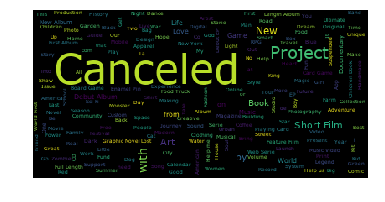

In [264]:
generate_wordcloud(onetext) # word cloud for all names of projects

# We see that canceled is large. show all senteces that have the word 'Canceled' in them

In [265]:
sents = nltk.sent_tokenize(onetext)    
keep = []
#print "part b) Print  all  the  sentences  in  which  the  word  “point”  appears.\n"
for i in range(len(sents)):
    sent_words = word_tokenize(sents[i])
    if "Canceled" in sent_words:
        keep.append(sents[i])
print(keep)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



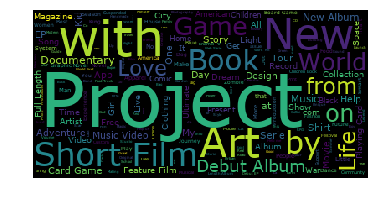

In [266]:
def generate_wordcloud(text): # optionally add: stopwords=STOPWORDS and change the arg below
    wordcloud = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                          relative_scaling = 1.0,
                          stopwords = {'to', 'of','the','for','in','and','a','an','Canceled'} # set or space-separated string
                          ).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

generate_wordcloud(onetext)

In [267]:
len(onetext)

13947910

In [268]:
onetext[0:33]

'The Songs of Adelaide & Abullah@ '

In [269]:
sents = nltk.sent_tokenize(onetext) 

In [270]:
len(sents)

62129

In [271]:
sents[0:2]

['The Songs of Adelaide & Abullah@ Greeting From Earth: ZGAC Arts Capsule For ET@ Where is Hank?',
 '@ ToshiCapital Rekordz Needs Help to Complete Album@ Community Film Project: The Art of Neighborhood Filmmaking@ Monarch Espresso Bar@ Support Solar Roasted Coffee & Green Energy!']

In [272]:
sent_word = word_tokenize(sents[0])

In [273]:
sent_word

['The',
 'Songs',
 'of',
 'Adelaide',
 '&',
 'Abullah',
 '@',
 'Greeting',
 'From',
 'Earth',
 ':',
 'ZGAC',
 'Arts',
 'Capsule',
 'For',
 'ET',
 '@',
 'Where',
 'is',
 'Hank',
 '?']

In [274]:
names_list[0:3] # so text is ctually was sent is!!!! use text as snet words

['The Songs of Adelaide & Abullah',
 'Greeting From Earth: ZGAC Arts Capsule For ET',
 'Where is Hank?']

In [275]:
keep = []
for i in range(len(names_list)):
    sent_words = word_tokenize(names_list[i])
    if "Canceled" in sent_words:
        keep.append(names_list[i])

In [276]:
keep[0:4] ## we see that canceled si included becacuse when the project gets canceled the name gets changed

['STUDIO IN THE SKY - A Documentary Feature Film (Canceled)',
 'Raise the Woof, expanding the love (Canceled)',
 'Glyscian Debut Album Recording (Canceled)',
 'Fishtacular - The Ultimate Fishing Tool (Canceled)']

# so now we will remove canceled from the word cloud because it appears when projects get canceled

In [277]:
len(keep)

23104

In [278]:
sum(ks.state == 'canceled')

38779

In [279]:
len(names_list)

378657

In [280]:
len(ks.name)

378657

# now make a distribution of the rarest words and see the title they appear in

In [281]:
fdist = nltk.FreqDist(names_list)

In [282]:
names_list[0:3] # text is a list where each item si the name of a project

['The Songs of Adelaide & Abullah',
 'Greeting From Earth: ZGAC Arts Capsule For ET',
 'Where is Hank?']

In [283]:
onetext[0:33] # onetext is a paragraph of every single project name strung together in a giant string

'The Songs of Adelaide & Abullah@ '

In [317]:
fdist.most_common(50) # most common phrases occuring in the names

[('New EP/Music Development', 41),
 ('Canceled (Canceled)', 13),
 ('Music Video', 11),
 ('N/A (Canceled)', 11),
 ('Cancelled (Canceled)', 10),
 ('New EP / Music Development', 10),
 ('Debut Album', 10),
 ('The Journey', 9),
 ('Reflections', 9),
 ('The Other Side', 8),
 ("A Midsummer Night's Dream", 8),
 ('Pizza', 8),
 ('The Awakening', 8),
 ('Choices', 7),
 ('Pasta Salad', 7),
 ('Karma', 6),
 ('Project (Canceled)', 6),
 ('Alone', 6),
 ('The Wall', 6),
 ('Guacamole', 6),
 ('Broken', 6),
 ('Home', 6),
 ('Chocolate Chip Cookies', 6),
 ('Through My Eyes', 6),
 ('Romeo & Juliet', 6),
 ('The Mission', 6),
 ('a (Canceled)', 6),
 ('Redemption', 5),
 ('Nocturne', 5),
 ('Egg Salad', 5),
 ('My Debut Album', 5),
 ('Perception', 5),
 ('Homemade Pizza', 5),
 ('My First Album', 5),
 ('The Hive', 5),
 ('Macaroni Salad', 5),
 ('A New Beginning', 5),
 ('The Bridge', 5),
 ('Forget Me Not', 5),
 ('LOVE', 5),
 ('Memento Mori', 5),
 ('Bacon', 5),
 ('United We Stand', 5),
 ('Wonderland', 5),
 ('New Album', 5)

In [285]:
tokens = nltk.word_tokenize(onetext)

In [286]:
print([word.lower() for title in text[0:3] ] )#if word.isalpha() ])

["princess viola's amazing forest journey by g.s. coltman", "princess viola's amazing forest journey by g.s. coltman", "princess viola's amazing forest journey by g.s. coltman"]


# To fix redundency, make every project name lower case, and remove names that include the word canceled. 

In [321]:
lower_names=[name.lower() for name in names_list ]#for word in name ]

In [322]:
lower_names_no_cancel = [name for name in lower_names if 'cancel' not in name]

In [324]:
lower_names_no_cancel[0:4]

['the songs of adelaide & abullah',
 'greeting from earth: zgac arts capsule for et',
 'where is hank?',
 'toshicapital rekordz needs help to complete album']

In [327]:
fdist2 = nltk.FreqDist(lower_names_no_cancel)

In [331]:
len(ks.name)

378657

In [333]:
len(fdist2.most_common())

351823

In [337]:
fdist2.most_common(20)

[('new ep/music development', 41),
 ('music video', 12),
 ('debut album', 11),
 ('the journey', 10),
 ('new ep / music development', 10),
 ('my first album', 10),
 ('the other side', 9),
 ('choices', 9),
 ("a midsummer night's dream", 9),
 ('reflections', 9),
 ('pizza', 9),
 ('run', 8),
 ('home', 8),
 ('the awakening', 8),
 ('karma', 7),
 ('love', 7),
 ('eden', 7),
 ('the wall', 7),
 ('limbo', 7),
 ('new album', 7)]

# now look at some of the least common phrases in project names

In [340]:
fdist2.most_common()[-240:]

[('eminent domain: our first album (25 years after the fact)', 1),
 ('wild times', 1),
 ('serialboxtv: pilot episode featuring noah gundersen', 1),
 ("jackie's art. help to protect, preserve, and exhibit it!", 1),
 ('tapper quest for the cherry - an android app video game', 1),
 ('death by scrabble', 1),
 ('devoted shirts', 1),
 ('publishing an eco-adventure book to educate children', 1),
 ('me & the single married man', 1),
 ('piratinies: a fast paced game of pirates and dice', 1),
 ('the new young fogies cd!', 1),
 ("lachlan whyte's kickstarter - 1st album - music, tour, art", 1),
 ('hell awaits... wave 1', 1),
 ('posh imirror', 1),
 ('camels, gifts and 3 wise men : keeping christ in christmas', 1),
 ('"the unknown son" feature film', 1),
 ('luxurious leather bags 70% below usual retail prices.', 1),
 ('65th. a supernatural thriller based on a true story', 1),
 ('empty handed', 1),
 ('cool the inside of your vehicle down before you get in.', 1),
 ("freedom's first principles", 1),
 (

# we see most of it is punctuation, so remove all puncutation from all the list of project names in 'onetext'

In [291]:
words = nltk.word_tokenize(onetext)

words=[word.lower() for word in words if word.isalpha()] # now words is all the words in the names

In [292]:
words[0:3]

['the', 'songs', 'of']

In [341]:
fdist3 = nltk.FreqDist(words)

# check to see how analyzing a giant string of names as connected words differs from a list of names

In [351]:
words_in_names = nltk.word_tokenize(onetext)

# now make sure all words in the names are lower case to compare just by word for a dist of words -- not phrases

In [363]:
words_in_names_lower = [word.lower() for word in words_in_names]

In [364]:
words_in_names_lower_alpha = [word for word in words_in_names_lower if word.isalpha()]

In [365]:
check_dist = nltk.FreqDist(words_in_names_lower_alpha)

## HERE ARE JUST THE DISTRIBUTIONS OF WORDS IN THE PROJECT NAMES 

In [414]:
check_dist.most_common(40) 

[('the', 104909),
 ('a', 51301),
 ('of', 37586),
 ('and', 25597),
 ('for', 24165),
 ('canceled', 23149),
 ('to', 20839),
 ('in', 17890),
 ('album', 14033),
 ('new', 13845),
 ('film', 11624),
 ('project', 11615),
 ('by', 10027),
 ('book', 9795),
 ('your', 9497),
 ('game', 9139),
 ('with', 8693),
 ('art', 8057),
 ('music', 7496),
 ('on', 7439),
 ('an', 7334),
 ('first', 6599),
 ('help', 6542),
 ('my', 6539),
 ('world', 6420),
 ('you', 6148),
 ('from', 5605),
 ('short', 5429),
 ('debut', 4993),
 ('life', 4946),
 ('is', 4725),
 ('ep', 4696),
 ('i', 4469),
 ('series', 4403),
 ('documentary', 4214),
 ('video', 4001),
 ('love', 3976),
 ('at', 3890),
 ('it', 3840),
 ('one', 3809)]

In [367]:
check_dist.most_common()[-30:] 

[('phaxanation', 1),
 ('recliners', 1),
 ('marmora', 1),
 ('btcg', 1),
 ('appcarz', 1),
 ('theatorium', 1),
 ('unrb', 1),
 ('slushengine', 1),
 ('roboteurs', 1),
 ('fluxpanel', 1),
 ('thrombosis', 1),
 ('clot', 1),
 ('subpos', 1),
 ('vendredi', 1),
 ('onit', 1),
 ('narcos', 1),
 ('leneal', 1),
 ('liberties', 1),
 ('collinwood', 1),
 ('loreto', 1),
 ('transcaucasia', 1),
 ('cis', 1),
 ('enby', 1),
 ('superette', 1),
 ('épouvantails', 1),
 ('erinoth', 1),
 ('islanda', 1),
 ('chkntruk', 1),
 ('biodefense', 1),
 ('ayiti', 1)]

# see the most common words that appear in all of the project names

In [368]:
freq_list = check_dist.most_common(10)

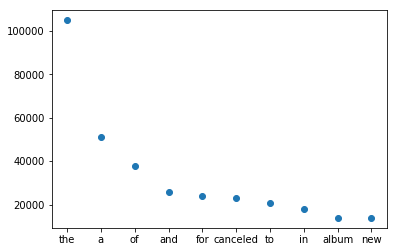

In [370]:
plt.scatter(*zip(*freq_list))
plt.show()

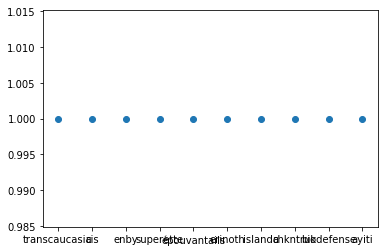

In [374]:
low_freq_list = check_dist.most_common()[-10:]
plt.scatter(*zip(*low_freq_list))
plt.show()

In [383]:
check_dist['the']

104909

In [385]:
check_dist['happy']

565

In [394]:
check_dist['ucla'] # UCLA APPEARS IN 9 TITLES

9

In [400]:
check_dist['usc'] # usc appears in 66 titles :(

66

In [410]:
usc_in_name = []
for i in range(len(names_list)):
    sent_words = word_tokenize(names_list[i])
    sent_words = [w.lower() for w in sent_words]
    if "usc" in sent_words:
        usc_in_name.append(names_list[i])

# FIND THE TITLES THAT INCLUDE THE WORD USC AND COMPARE TO TITLES THAT INCLUDE THE WORD UCLA

In [411]:
usc_in_name 

['The Process - A USC Thesis Film',
 'The History Boys at USC',
 "It's Better In Italian - A USC Documentary Thesis",
 'USC Alumnus, Robert Amerson: Making Waves (A Studio Album)',
 'Lonely as God - A USC Thesis Film',
 'TEN THOUSAND MILES - A USC Thesis Film',
 'USC Korean Culture Night 2012',
 'Reunion: A USC Thesis Film',
 'M for Mediocrity : a USC Student Short Film',
 'Pocketful of Posy USC Grad Film',
 "I'll Be Seeing You (A USC Student Production)",
 'Mammoth - a USC Thesis Film',
 'Francis - A USC Thesis Film',
 '"DAD" - A USC Short Film',
 'Faith Need Not Change Her Gown - A USC MFA Thesis Film',
 'ROYA - A USC MFA Thesis Film',
 'Lark, a USC Short Film',
 'CHICAGO The Musical at USC',
 'Dante Falls - A USC MFA Thesis Film',
 'PROTOTYPE - An Afrofuturist USC Thesis Film',
 'Solo exhibitions & Research at UCLA Medical Center & USC',
 'The Best and the Loneliest Days, a USC thesis film',
 'The Party Dress - A USC Graduate Thesis Film',
 'The Three Play Repertory of the USC MFA C

In [412]:
ucla_in_name = []
for i in range(len(names_list)):
    sent_words = word_tokenize(names_list[i])
    sent_words = [w.lower() for w in sent_words]
    if "ucla" in sent_words:
        ucla_in_name.append(names_list[i])

In [413]:
ucla_in_name

['C.O.N.C.A. Go to UCLA',
 'Solo exhibitions & Research at UCLA Medical Center & USC',
 '"A Long Day"- A UCLA Graduate Thesis Film',
 'UCLA Bruin Harmony takes on another album!',
 'Shakespeare at UCLA presents Twelfth Night: Or What You Will',
 'UCLA Thesis Preview, Berlin Debut!',
 "Scottie's UCLA Thesis Production",
 'UCLA RT3DA and VR Games Showcase',
 'The Martyr - UCLA 35mm Thesis Film tackling Islamophobia']

# see what the title are that have these least common

In [314]:
testList3 = fdist3.most_common()[-20:] # note these all occur just once

In [315]:
testList3

[('thrombosis', 1),
 ('clot', 1),
 ('subpos', 1),
 ('vendredi', 1),
 ('onit', 1),
 ('narcos', 1),
 ('leneal', 1),
 ('liberties', 1),
 ('collinwood', 1),
 ('loreto', 1),
 ('transcaucasia', 1),
 ('cis', 1),
 ('enby', 1),
 ('superette', 1),
 ('épouvantails', 1),
 ('erinoth', 1),
 ('islanda', 1),
 ('chkntruk', 1),
 ('biodefense', 1),
 ('ayiti', 1)]

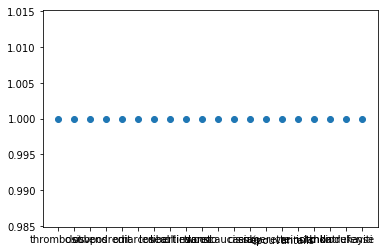

In [313]:
plt.scatter(*zip(*testList3))
plt.show()

# now do word analysis but remove excesss words with less meaning

### now the words we consider are all lowercase, are only alphabetic, and do not have stop words or preposition filler words

In [416]:
from stop_words import get_stop_words
from nltk.corpus import stopwords

stop_words = list(get_stop_words('en'))         #Have around 900 stopwords
nltk_words = list(stopwords.words('english'))   #Have around 150 stopwords
stop_words.extend(nltk_words)

meaningful_words_cleaned = []
for words in words_in_names_lower_alpha:
    if not words in stop_words:
        meaningful_words_cleaned.append(words)

In [418]:
meaningful_fdist = nltk.FreqDist(meaningful_words_cleaned)

In [419]:
meaningful_fdist.most_common(30)

[('canceled', 23149),
 ('album', 14033),
 ('new', 13845),
 ('film', 11624),
 ('project', 11615),
 ('book', 9795),
 ('game', 9139),
 ('art', 8057),
 ('music', 7496),
 ('first', 6599),
 ('help', 6542),
 ('world', 6420),
 ('short', 5429),
 ('debut', 4993),
 ('life', 4946),
 ('ep', 4696),
 ('series', 4403),
 ('documentary', 4214),
 ('video', 4001),
 ('love', 3976),
 ('one', 3809),
 ('tour', 3350),
 ('story', 3328),
 ('novel', 3293),
 ('app', 3212),
 ('make', 3076),
 ('cd', 2974),
 ('show', 2826),
 ('food', 2776),
 ('cards', 2743)]

In [421]:
meaningful_fdist.most_common()[-30:]

[('phaxanation', 1),
 ('recliners', 1),
 ('marmora', 1),
 ('btcg', 1),
 ('appcarz', 1),
 ('theatorium', 1),
 ('unrb', 1),
 ('slushengine', 1),
 ('roboteurs', 1),
 ('fluxpanel', 1),
 ('thrombosis', 1),
 ('clot', 1),
 ('subpos', 1),
 ('vendredi', 1),
 ('onit', 1),
 ('narcos', 1),
 ('leneal', 1),
 ('liberties', 1),
 ('collinwood', 1),
 ('loreto', 1),
 ('transcaucasia', 1),
 ('cis', 1),
 ('enby', 1),
 ('superette', 1),
 ('épouvantails', 1),
 ('erinoth', 1),
 ('islanda', 1),
 ('chkntruk', 1),
 ('biodefense', 1),
 ('ayiti', 1)]